## Исследование данных о российском кинопрокате



В данной работе анализируется рынок российского кинопроката и выявляются текущие тренды.


**Цель исследования** — исследование рынка российского кинопроката.

1. Проанализировать общие данные, найти динамику проката и суммы сборов по годам, влияние возрастного ограничения на сборы.

2. Исследование фильмов, получивших государственную поддержку.


**Описание данных**

Работа состоит из двух таблиц, которые необходимо соединить в одну. Первая таблица содержит информацию о прокатных удостоверениях, вторая — данные о прокате в российских кинотеатрах.


**План работы**

Исследование продет в пять этапов:
1. Открытие таблиц с данными и поседующее их соединение;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Исследовательский анализ фильмов, получивших государственную поддержку;
5. Общий вывод о проделанной работе.

### Шаг 1. Откроем файлы с данными и объедим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import numpy as np #импорт библиотеки numpy
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) #игнорирование предупреждения
import warnings #импорт warnings
from pandas.core.common import SettingWithCopyWarning  #импорт SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning) #игнорирование предупреждения

In [2]:
movie = pd.read_csv('/datasets/mkrf_movies.csv') #читаем файл
movie.head(5) #выводим первые 5 строк

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
movie.info() #общая информация о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [4]:
movie['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Столбец `puNumber` имеет тип `object`. В данном столбце есть значение "нет". Выведем на экран усеченную таблицу с этим значением. 

In [5]:
movie.query('puNumber == "нет"') #усеченная таблица

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
movie['puNumber'] = movie['puNumber'].str.replace('нет','0') #заменим на 0
movie['puNumber'] = pd.to_numeric(movie['puNumber']) #заменим тип данных на числовой
movie.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 877.4+ KB


In [7]:
shows = pd.read_csv('/datasets/mkrf_shows.csv') #читаем файл
pd.options.display.float_format = '{:,.2f}'.format #избавимся от экспоненциального формата
shows.head(5) #выводим первые 5 строк

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [8]:
shows.info() #общая информация о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [9]:
data = movie.merge(shows, on = 'puNumber', how = 'outer') #соединяем файлы
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.2+ KB


#### Вывод

На данном этапе работы были загружены библиотеки, открыты и соединины файлы.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Столбец `show_start_date` имеет тип данных `object` заменим его на тип даты и времени. 

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.%fZ') #заменим формат
data.info()  #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 994.2+ KB


In [11]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

В столбце рейтинга есть проблемные значения с процентами. Вероятнее всего они могли появиться из-за некорретного ввода значений рейтинга. Можно убрать значения процента, перевести столбец в тип данных `float16` и разделить полученное число на 10 для корректности процентных значений.

In [12]:
data['ratings'] = data['ratings'].str.replace('%','')
data['ratings']=data['ratings'].astype('float16')
data.loc[data['ratings'] > 10,'ratings'] /=10
data['ratings'].sort_values().unique()

array([1.        , 1.09960938, 1.20019531, 1.29980469, 1.40039062,
       1.5       , 1.59960938, 1.70019531, 1.79980469, 1.90039062,
       2.09960938, 2.40039062, 2.5       , 2.59960938, 2.69921875,
       2.80078125, 2.90039062, 3.        , 3.09960938, 3.19921875,
       3.30078125, 3.40039062, 3.5       , 3.59960938, 3.69921875,
       3.80078125, 3.90039062, 4.        , 4.1015625 , 4.19921875,
       4.30078125, 4.3984375 , 4.5       , 4.6015625 , 4.69921875,
       4.80078125, 4.8984375 , 5.        , 5.1015625 , 5.19921875,
       5.30078125, 5.3984375 , 5.5       , 5.6015625 , 5.69921875,
       5.80078125, 5.8984375 , 6.        , 6.1015625 , 6.19921875,
       6.30078125, 6.3984375 , 6.5       , 6.6015625 , 6.69921875,
       6.80078125, 6.8984375 , 7.        , 7.1015625 , 7.19921875,
       7.30078125, 7.3984375 , 7.5       , 7.6015625 , 7.69921875,
       7.80078125, 7.8984375 , 8.        , 8.1015625 , 8.203125  ,
       8.296875  , 8.3984375 , 8.5       , 8.6015625 , 8.70312

#### Шаг 2.2. Изучим пропуски в датафрейме



В столбцах `film_studio`,`production_country`,`director`,`producer`,`age_restriction`,`refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres`, `box_office` есть пропуски. Стобцы с пропусками, связанные с государственным финансированием, скорее всего не получали финансирования или не афишировали эти данные, оставим их как есть. В оставшихся категориальных столбцах пропуски заменим на "не определено", чтобы не терять данные.

In [13]:
columns_to_replace = ['film_studio', 'production_country', 'director','financing_source', 'producer','age_restriction','ratings','genres'] #создание списка с названиями колонок
#цикла для замены пустых значений в вышеперечисленных столбцах
for column in columns_to_replace: 
    data[column] = data[column].fillna('unknown')
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns]
type                     7486 non-null object
film_studio              7486 non-null object
production_country       7486 non-null object
director                 7486 non-null object
producer                 7486 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         7486 non-null object
ratings                  7486 non-null object
genres                   7486 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(10)
memory usage: 994.2+ KB


#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. 

In [14]:
data.duplicated().sum()# подсчёт явных дубликатов

0

Полных дубликатов не обнаружено. Дубликатов не должно быть в столбце `puNumber`,  так как там находятся уникальные значения.

In [15]:
data['puNumber'].value_counts()

221054410    2
221154310    2
114001919    1
221025616    1
221136210    1
            ..
121034419    1
112025418    1
111008518    1
121000711    1
0            1
Name: puNumber, Length: 7484, dtype: int64

In [16]:
data.query('puNumber == "221054410" or puNumber == "221154310"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,unknown,7.00,"мелодрама,комедия",nan
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,unknown,7.60,"драма,мелодрама,история",nan
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,unknown,7.40,"комедия,криминал",nan
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,unknown,6.80,"комедия,криминал",nan


Можно заметить, что первая пара дубликатов появилась случайным образом, это вовсе не дубликаты, скорее всего была допущена ошибка при заполнении столбца номера прокатного удостоверения. Во второй паре заметен дубликат, только по-разному написаны имя режиссера, в третей строке добавлена страна Австралия, рейтинг, по-разному написаны студии-производители и разные возрастные категории.  Удалим последнюю строчку.

In [17]:
data = data.drop(labels = [5068], axis = 0) 
data.query('puNumber == "221054410"') #проверим

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,unknown,7.40,"комедия,криминал",nan


В столбце названия фильма должны содержаться уникальные значения. Однако данные строки с дублирующимя названием не являются полыми дубликатами, так как у них точно отличается прокатное удостоверение. Например, у римейков могут быть разные прокатные удостоверения, это явно разные фильмы и считать их дубликатами нельзя. Более того, для проката в разных сетях (например в кинотеатрах и на тв) выдаются разные прокатные удостоверения. Но все-таки проверим количество уникальных значений для определенного фильма.

In [18]:
data['title'].value_counts()

День святого Валентина_                             5
Робин Гуд (Robin Hood)                              4
Дорога /По новелле Кормака МкКарфи/                 4
Безумцы                                             4
Не брать живым /По книге Раджива Чандрасекарана/    4
                                                   ..
Однажды... в Голливуде                              1
Сумерки /По одноименному роману Стефани Майер/      1
Малавита                                            1
Контрибуция (режиссерская версия)                   1
Queen. Live in Budapest 1986                        1
Name: title, Length: 6771, dtype: int64

Видим, что дубликаты по названию есть, но ничего делать с представленными фильмами не будем, так как они не являются полными дубликатами, а их удаление приведет к искажению данных. 

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.


In [19]:
data['type'].sort_values().unique() #уникальные значения столбца

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [20]:
data['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'ристалл Сити Интертейнмент, Эксклюзив Медиа Групп, Хоуп Таун Интертейнмент, Каппа Андерковар Пикчерз, Скарлет Файр Интертейнмент',
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс'], dtype=object)

In [21]:
data['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'unknown',
       'Австралия', 'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Арм

In [22]:
data['financing_source'].sort_values().unique()

array(['unknown', 'Министерство культуры',
       'Министерство культуры, Фонд кино', 'Фонд кино'], dtype=object)

In [23]:
data['producer'].sort_values().unique()

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ...,
       'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
       'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез'], dtype=object)

In [24]:
data['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [25]:
data['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [26]:
data['genres'].sort_values().unique()

array(['unknown', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', '

In [27]:
data['title'].sort_values().unique()

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

Судя по данным, можно заметить, что ненужные пробелы есть в некоторых столбцах не только в начале значений, но и в конце. Удалим эти пробелы во всех столбцах, и вместе с этим переведем все значения в нижний регистр.

In [28]:
columns_to_strip = ['film_studio', 'production_country', 'type','financing_source', 'producer','age_restriction','genres','director','title'] #создание списка с названиями колонок
#цикл для вышеперечисленных столбцов, чтобы убрать пробелы, а затем перевести в нижний регистр 
for column in columns_to_strip: 
    data[column] = data[column].str.strip()
    data[column] = data[column].str.lower()
data['type'].unique()# проверим один столбец

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

Почти во всех категориальных данных три общие проблемы:
1. Пробелы в начале и конце значений;
2. Нарушен регистр (заглавные буквы встречаются в середине слова)
3. Встречаются списки, то есть значения в одной строке записаны через запятую.

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


Столбец `budget` должен быть как сумма столбцов `refundable_support` и `nonrefundable_support`. Проверим есть ли строки, где столбец `budget` меньше суммы столбцов `refundable_support` и `nonrefundable_support`. Но для начала выведем общую информацию о столбцах.

In [29]:
data['budget'].describe() #информация о столбце

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

In [30]:
data.query('budget > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",министерство культуры,8.10,"драма,мелодрама","365,353.60"
1448,бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",министерство культуры,unknown,unknown,"28,140.00"
1498,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",фонд кино,5.30,"комедия,фантастика","19,957,031.50"
1524,берцы,111004314,2014-05-05 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",министерство культуры,4.20,драма,"55,917.50"
1792,братья ч,111004414,2014-04-23 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",министерство культуры,6.40,драма,"232,100.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,союз спасения,111022019,2019-12-26 12:00:00,художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",фонд кино,6.00,"история,биография,драма","717,703,185.53"
7466,иван царевич и серый волк 4,114005019,2019-12-20 12:00:00,анимационный,"ооо ""студия анимационного кино ""мельница""",россия,"д.шмидт, к.феоктистов","с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00"
7474,вторжение,111022519,2019-12-23 12:00:00,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",фонд кино,5.70,"фантастика,боевик",nan
7476,я свободен,111023019,2019-12-26 12:00:00,художественный,"ао ""тпо ""киностудия им. м.горького""",россия,и.северов,с.зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",министерство культуры,5.90,драма,nan


In [31]:
data['refundable_support'].describe()

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

In [32]:
data['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

In [33]:
data.query('budget < (refundable_support + nonrefundable_support)') #усеченная таблица

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
2058,дуxless 2,111000415,2015-01-26 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,фонд кино,6.60,драма,"446,163,511.00"
2472,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,бармен.,111009615,2015-05-26 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,тряпичный союз,111010215,2015-06-08 12:00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,помню - не помню!,111004916,2016-03-01 12:00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,министерство культуры,4.30,комедия,"15,362,931.43"
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,притяжение (2016),111018116,2016-12-16 12:00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,фонд кино,5.60,фантастика,"1,038,321,489.00"


Исправим эти значения на сумму столбцов `refundable_support` `nonrefundable_support`.

In [34]:
def column(row):
    if row['budget'] == 0:
        return row['refundable_support'] + row['nonrefundable_support']
    else:
        return row['budget']
data['budget'] = data.apply(column, axis = 1)
data.query('budget < (refundable_support + nonrefundable_support)') #проверим

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [35]:
data['year'] = data['show_start_date'].dt.year #новый столбец 


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [36]:
#функция для отсеивания значений до запятой в колонках
def column(row):
    return row.split(',')[0]
data['first_director']=data['director'].apply(column)
data['main_genre']=data['genres'].apply(column)


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [37]:
#доля в процентах
data['part_support'] = (data['refundable_support']+data['nonrefundable_support'])/data['budget']*100
data.head(5) #проверим

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,main_genre,part_support
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,nan,nan,nan,unknown,7.20,"боевик,драма,мелодрама",nan,2015,кевин костнер,боевик,nan
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,«6+» - для детей старше 6 лет,nan,nan,nan,unknown,6.60,"драма,военный",nan,2016,е.матвеев,драма,nan
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,nan,nan,nan,unknown,6.80,"фантастика,боевик,триллер",nan,2016,тимур бекмамбетов,фантастика,nan
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,nan,nan,nan,unknown,6.80,"фантастика,боевик,триллер",nan,2016,тимур бекмамбетов,фантастика,nan
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,nan,nan,nan,unknown,6.80,"фантастика,боевик,триллер",nan,2015,тимур бекмамбетов,фантастика,nan


#### Вывод

 На данном этапе работы была проведена предобработка данных. Исправлены типы данных, удален дубликат, исправлены значения в столбцах, добавлены новые столбцы.

### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

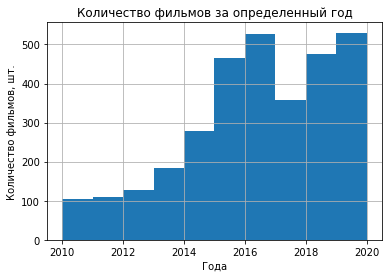

In [38]:
df = data.query('box_office >= 0') #таблица, у которой нет пустых значений в столбце сборов
df['year'].hist(bins = 10,range = (2010,2020))  #построение гистогрммы
plt.xlabel('Года'), plt.ylabel('Количество фильмов, шт.')
plt.title('Количество фильмов за определенный год')
plt.show()

Большее количество фильмов вышло в 2016 и в 2019 годах, меньшее — в 2010.

В кинотеатрах не вышли фильмы,  у которых сборы в рублях равны нулю или нет данных о сборах. Посчитаем долю тех, что вышли в кинотеатры.

In [39]:
part_cinema = len(df)/len(data)*100
part_cinema

42.19104876419505

То есть 42% от всего количества фильмов, представленных в таблице, вышли в кинотеатрах  и имеют сборы.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Создадим сводную таблицу по суммарному значению сборов проката по годам. 

In [40]:
sum_data = df.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
sum_data.columns = ['box_office']
sum_data

,box_office
year,
2010,"2,428,654.00"
2011,"14,102,765.00"
2012,"6,955,423.00"
2013,"29,799,706.20"
2014,"7,444,951,859.20"
2015,"39,497,365,196.40"
2016,"47,866,299,741.91"
2017,"48,563,707,217.51"
2018,"49,668,403,134.32"


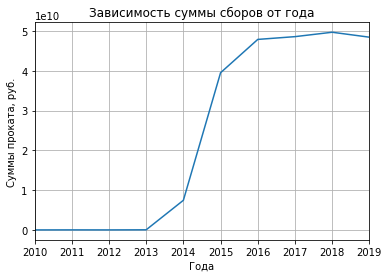

In [41]:
sum_data.plot( y = 'box_office', grid = True, legend = False)
plt.xlabel('Года') , plt.ylabel('Суммы проката, руб.')
plt.title('Зависимость суммы сборов от года')
plt.show()

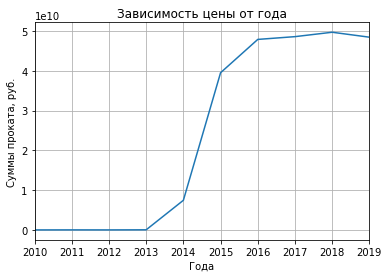

In [42]:
# КОД РЕВЬЮЕРА
sum_data.plot( y = 'box_office', grid = True, legend = False)
plt.xlabel('Года') , plt.ylabel('Суммы проката, руб.')
plt.title('Зависимость цены от года')
plt.show()

Судя по сводной таблице и графику, наименьшая сумма сборов была в 2010 году, а наибольшаяя в 2018.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [43]:
#сводная таблица по медиане и среднему
median_data = df.pivot_table(index = 'year', values ='box_office', aggfunc = ['median','mean'])
median_data.columns = ['median','mean']
median_data

,median,mean
year,,
2010,"1,700.00","23,130.04"
2011,"3,000.00","129,383.17"
2012,"5,660.00","54,339.24"
2013,"3,522.50","161,954.92"
2014,"18,160.00","26,684,415.27"
2015,"4,920,933.00","84,940,570.31"
2016,"3,846,679.41","91,000,569.85"
2017,"9,968,340.00","136,032,793.33"
2018,"8,891,102.21","104,565,059.23"


По данным таблицы, можно сделать вывод, что наименьшие суммы сборов были в 2010 году, а наибольшие в 2017 году. Средняя и медианная меры достаточно сильно различаются между собой, что говорит о широком разбросе значений данных, а среднее более чувствительно к выбросам, поэтому значения в этом столбце больше. В данном случае корректнее будет судить по медиане.  

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [44]:
good_data = data.query('year >=2015') # выделим данные от 2015 года в отдельную таблицу

In [45]:
#создадим сводную таблицу и выведем на экран
good_data = good_data.pivot_table(index = 'age_restriction', values = 'box_office')
good_data.columns = ['box_office']
good_data

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,"8,890,960.72"
«12+» - для детей старше 12 лет,"174,193,812.15"
«16+» - для детей старше 16 лет,"94,453,085.27"
«18+» - запрещено для детей,"51,464,161.08"
«6+» - для детей старше 6 лет,"176,020,854.26"


Меньше всего собирают фильмы для любого возраста. Наибольшие сборы собирают фильмы с ограничением стерше 6 и 12 лет.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Создадим отдельную таблицу, в которой будет обязательно больше или равно нулю будут или возвратные, или невозвратные средства государственной поддержки.

In [46]:
gover = data.query('refundable_support >= 0 or refundable_support >= 0')
gover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
title                    332 non-null object
puNumber                 332 non-null int64
show_start_date          332 non-null datetime64[ns]
type                     332 non-null object
film_studio              332 non-null object
production_country       332 non-null object
director                 332 non-null object
producer                 332 non-null object
age_restriction          332 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  332 non-null object
genres                   332 non-null object
box_office               318 non-null float64
year                     332 non-null int64
first_director           332 non-null object
main_genre               332 non-null object
part_support             3

Посмотрим в каких годах фильмов выходило больше, а в каких меньше.

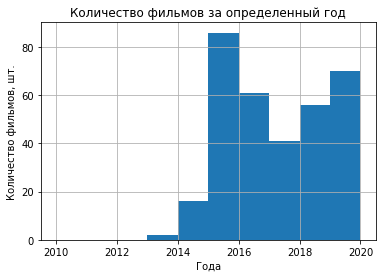

In [48]:
gover['year'].hist(bins = 10,range = (2010,2020))  #построение гистогрммы
plt.xlabel('Года'), plt.ylabel('Количество фильмов, шт.')
plt.title('Количество фильмов за определенный год')
plt.show()

Судя по гистограмме, с 2010 года по 2012 государство не обеспечивало фильмы. Больше всего денег выделили в 2015 году. Сократим таблицу до 2013 года.

In [49]:
gover = gover.query('year > 2012')

Посмотрим на окупаемость фильмов. Создадим новый столбец окупаемости, а затем сводную таблицу с медианным значением по окупаемости.

In [50]:
gover['payback'] = gover['box_office'] - gover['refundable_support'] - gover['nonrefundable_support']
median_gover = gover.pivot_table(index = 'year', values ='payback', aggfunc = 'median')
median_gover.columns = ['median']
median_gover

,median
year,
2013,"-57,012,779.95"
2014,"-22,633,116.65"
2015,"-23,145,665.50"
2016,"-24,593,903.25"
2017,"15,108,014.76"
2018,"-5,886,927.41"
2019,"-18,581,584.79"


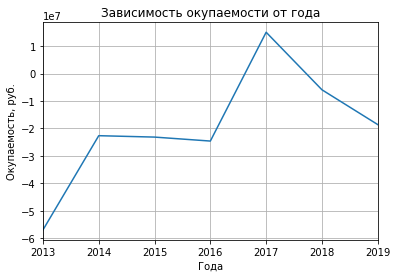

In [51]:
median_gover.plot( y = 'median', grid = True, legend = False)
plt.xlabel('Года') , plt.ylabel('Окупаемость, руб.')
plt.title('Зависимость окупаемости от года')
plt.show()

По данным таблицы и диаграммы, можно сделать вывод, что в 2017 чаще всего фильмы окупались, чего нельзя сказать про другие года.

Оценим на какое ограничение по возрасту выделяется больше бюджета.

In [52]:
gover_budg = gover.pivot_table(index = 'age_restriction', values = 'budget') #построение сводной таблицы
gover_budg.columns = ['budget']
gover_budg

,budget
age_restriction,
«0+» - для любой зрительской аудитории,"112,873,073.12"
«12+» - для детей старше 12 лет,"147,056,094.42"
«16+» - для детей старше 16 лет,"94,732,735.49"
«18+» - запрещено для детей,"82,494,184.11"
«6+» - для детей старше 6 лет,"199,844,241.83"


По сводной таблице видно,что на ограничение по возрасту 18+ выделяется меньше денег. Наибольшее количество денег выделяется на ограничение по возрасту 6+.

Посмотрим какой чаще всего рейтинг у представленных фильмов.

In [53]:
gover_rating = gover.query('ratings != "unknown"')
gover_rating['ratings'] = gover_rating['ratings'].astype(int)

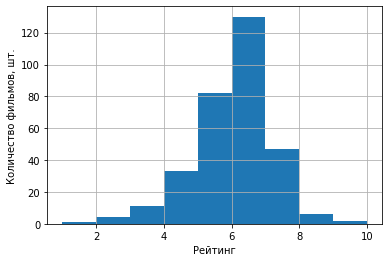

In [54]:
gover_rating['ratings'].hist(bins = 9,range = (1,10))  #построение гистогрммы
plt.xlabel('Рейтинг'), plt.ylabel('Количество фильмов, шт.')

plt.show()

Чаще всего таким фильмам ставят рейтинг 6 баллов, реже всего ставят 1 и 9.

#### Вывод

На данном этапе работы был проведен исследовательский анализ данных, построены графики, найдены интересные для анализа выводы.

### Шаг 5. Напишите общий вывод

В данной работе был проведен анализ кино. Большее количество фильмов вышло в 2016 и в 2019 годах, меньшее — в 2010. Однако наименьшие суммы сборов были в 2010 году, а наибольшие в 2017 году. 42% от всего количества фильмов, представленных в таблице, вышли в кинотеатрах и имеют сборы. 

Меньше всего собирают фильмы для любого возраста. Наибольшие сборы собирают фильмы с ограничением старше 6 и 12 лет.

Судя по гистограмме, с 2010 года по 2012 государство не обеспечивало фильмы. Больше всего денег выделили в 2015 году.

И в 2017 чаще всего фильмы окупались, чего нельзя сказать про другие года.

на ограничение по возрасту 18+ выделяется меньше денег. Наибольшее количество денег выделяется на ограничение по возрасту 6+ и 12+.